# Lecture 7

## References

* Numerical Python: Scientific Computing and Data Science Applications with Numpy, SciPy and Matplotlib (2nd Edition), Robert Johansson.  

## This Lecture
* Polynomial Interpolation
* Introduction of numpy's polynomial submodule

## Recall:

* Weierstrass theorem says any continuous function can be approximated by a polynomial
* fit $n+1$ data points $(x_i,y_i)$ for $i=0,...,n$ using a polynomial
* Finding a polynomial for these type of questions is often referred to as **Polynomial Interpolation**


Given  $n+1$ data points $(x_i,y_i)$ for $i=0,...,n$, we have a unique polynimial 
$$
p_n(x) = c_0+c_1x+c_2x^2+\dots+c_nx^n
$$
such that 
$$
p_n(x_i)=y_i,~~\forall i = 0,\dots,n
$$
This polynomial $P_n(x)$ is called interpolant.   


How to determine the polynomial?
1. Direct Approach: 
Given that $p_n(x)$ satisfies the $n+1$ conditions $p_n(x_i)=y_i,~~\forall i = 0,\dots,n$, we have the following $n+1$ equations

\begin{align} 
\begin{cases}
c_0+c_1x_0+c_2x_0^2+\dots+c_nx_0^n&=y_0 \\
c_0+c_1x_1+c_2x_1^2+\dots+c_nx_1^n&=y_1 \\
\hspace{0.2in}\vdots\hspace{1.in} & \vdots\\
c_0+c_1x_n+c_2x_n^2+\dots+c_nx_n^n&=y_n
\end{cases}
\end{align}
The above equation can be written into matrix form:
$$
\begin{bmatrix} 
1 & x_0 & \dots & x_0^2 \\
1 & x_1 & \dots & x_1^2 \\
\vdots& \vdots &\dots & \vdots\\
1 & x_n & \dots & x_n^2 \\
\end{bmatrix} 
\begin{bmatrix}
c_0\\
c_1\\
\vdots\\
c_n
\end{bmatrix} 
= 
\begin{bmatrix}
y_0\\
y_1\\
\vdots\\
y_n
\end{bmatrix} 
$$
This matrix 
$$
V= \begin{bmatrix}
1 & x_0 & \dots & x_0^2 \\
1 & x_1 & \dots & x_1^2 \\
\vdots& \vdots &\dots & \vdots\\
1 & x_n & \dots & x_n^2 \\
\end{bmatrix} 
$$
is called the Vandermonde Matrix. Solving the system of linear equations gives the coefficient of the polynimial. 

2. Lagrange Interpolation:
$$
p_n(x) = \sum_{k=0}^{n}y_k l_{k}(x) ~~~\text{with}~~~ l_k(x)=\prod_{j=0\\j\neq k}^n\frac{x-x_j}{x_k-x_j}
$$

3. Many more algoritgms such as **Newton, Chebyshev, Legendre** etc. to be learned by interested students from higher level numerical analysis courses. 


## Polynomials

Before we start to solve interpolation problems, we need a convinient way of working with polynomials in Python. 

We briefly introduce the NumPy submodule **polynomial**:

In [2]:
import numpy as np
# import the polynomial submodule as P
from numpy import polynomial as P

To create a polynomial instance, we can pass the coefficient array. The ith element of the array corresponds to $c_i$ of the polynomial

Example: we can create $p(x)=1+2x+3x^2$ by passing its coefficient array [1,2,3]

In [3]:
p1=P.Polynomial([1,2,3])

In [4]:
p1

Polynomial([1., 2., 3.], domain=[-1,  1], window=[-1,  1])

 We can also create a polynomial by specifying its roots

In [7]:
p2=P.Polynomial.fromroots([-1,1])

In [8]:
p2

Polynomial([-1.,  0.,  1.], domain=[-1.,  1.], window=[-1.,  1.])

For a given polynomial, we can compute its roots using the roots() method

In [9]:
p1.roots()

array([-0.33333333-0.47140452j, -0.33333333+0.47140452j])

In [10]:
p2.roots()

array([-1.,  1.])

Properties of the polynomial can be accessed using coeff, domain, 

In [11]:
p1.coef

array([1., 2., 3.])

In [12]:
p1.domain

array([-1,  1])

## Evaluating a polynomial at any values of $x$:

In [14]:
x=np.array([1.5,2.5,3.5]) 

In [16]:
p1(x) # elementwise evaluation

array([10.75, 24.75, 44.75])

## Polynomial Operations:
+,-,*,// (note: polynomial division uses //)

**Example**: consider $p_1=(x-3)(x-2)(x-1)$, $p_2=(x-2)$. 
If $p_3=p_1/p_2 $, then $p_3=(x-3)(x-1)$

In [17]:
p1=P.Polynomial.fromroots([3,2,1])

In [18]:
p2=P.Polynomial.fromroots([2])

In [19]:
p1

Polynomial([-6., 11., -6.,  1.], domain=[-1.,  1.], window=[-1.,  1.])

In [20]:
p2

Polynomial([-2.,  1.], domain=[-1.,  1.], window=[-1.,  1.])

In [21]:
p3=p1//p2

In [22]:
p3

Polynomial([ 3., -4.,  1.], domain=[-1.,  1.], window=[-1.,  1.])

In [23]:
p3.roots()

array([1., 3.])

In [24]:
p4=p1+p2

In [25]:
p4

Polynomial([-8., 12., -6.,  1.], domain=[-1.,  1.], window=[-1.,  1.])

## Polynomial Interpolation

Example: find the interpolating polynomial for the data points:
$$
(1,1), (2,3),(3,5),(4,4)
$$

The polynomial is of the form:
$$
p(x)=c_0+c_1x+c_2x^2+c_3x^3
$$

We use the direct approach. Thus we need to solve the linear system $V\mathbf{c}=\mathbf{y}$ and $V$ is the Vandermonde Matrix. 

* Python has conviently provides a function to compute Vandermonde Matrix (see example below).
* To obtain the coefficient of the polynomial, we solve  $V\mathbf{c}=\mathbf{y}$  using the linear algebra (**linalg**) submodule from scipy

In [26]:
x=np.array([1,2,3,4]) #x coordinates of data points
y=np.array([1,3,5,4]) #y coordinates of data points

In [28]:
deg = len(x)-1  # degree of the polynomial
V = P.polynomial.polyvander(x,deg)  # compute the Vandermonde matrix of deg

In [29]:
V

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.],
       [ 1.,  4., 16., 64.]])

In [31]:
from scipy import linalg
c=linalg.solve(V,y)

In [32]:
c

array([ 2. , -3.5,  3. , -0.5])

In [33]:
p=P.Polynomial(c) # the polynomial interpolant is found

In [34]:
p

Polynomial([ 2. , -3.5,  3. , -0.5], domain=[-1,  1], window=[-1,  1])

In [35]:
p(2.5) # we can evaluate at any x value using the interpolant

4.1875

We can also visualize the problem

In [36]:
import matplotlib.pyplot as plt

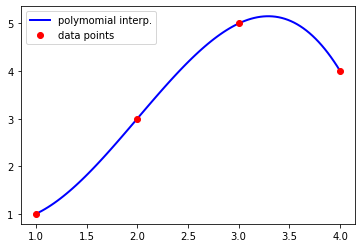

In [41]:
fig,ax=plt.subplots()
xx=np.linspace(x.min(),x.max(),100) # supersampled [x[0],x[-1]] interval for plotting
ax.plot(xx,p(xx),'b',lw=2,label='polymomial interp.')
ax.plot(x,y,'ro',label='data points')
ax.legend(loc='best')
plt.show()

Numpy's polynomial class actually provides a method **fit** to compute the interpolation polynomial

In [42]:
pp=P.Polynomial.fit(x,y,deg,[-1,1])

In [43]:
pp.coef # same as c computed from our method

array([ 2. , -3.5,  3. , -0.5])

## Drawbacks

* poly interp for a few data points is powerful
* increasing the number of data points increases the degree of the polynomial
* higher degree polynomial can be problematic in several ways:
 1. computationally more expensive to both determine and evaluate a high degree polynomial
 2. high degree polynomial is oscillatory: changes rapidly between data points (well-known Runge's phenominon)  
 
 
<font color='blue'>**Example** </font>: 
Consider the nth order interpolation using (n+1) equally spaced data points for the Runge's function
$$
f(x)=\frac{1}{1+25x^2}, ~x\in[-1,1]
$$

In [44]:
runge =lambda x: 1/(1+25*x**2) # define the Runge function 

def runge_interpolate(n):
    x = np.linspace(-1,1,n+1) # create equally spaced sample data points
    # find the degree n interpolating polynomial for the sample data points (x,runge(x))
    p = P.Polynomial.fit(x,runge(x),n) 
    return x, p

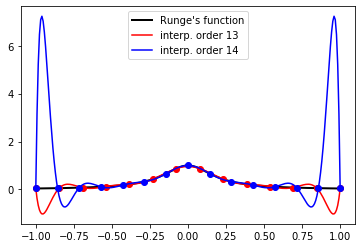

In [48]:
xx = np.linspace(-1,1,250) # over-sampling for plotting
fig,ax=plt.subplots()
ax.plot(xx,runge(xx),'k',lw=2,label="Runge's function")
# 13 th order interpolation of the Runge's function
n=13
x,p=runge_interpolate(n)
ax.plot(x,runge(x),'ro') # plot the data points
ax.plot(xx,p(xx),'r',label='interp. order %d' %n)
# 14 th order interpolation of the Runge's function
n=14
x,p=runge_interpolate(n)
ax.plot(x,runge(x),'bo') # plot the data points
ax.plot(xx,p(xx),'b',label='interp. order %d' %n)

ax.legend(loc='best')
plt.show()

A solution to this is to use piecewise low-order polynomials when interpolating a larger number of data points, i.e., 
**Spline Interpolation** 